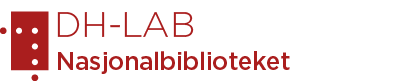

In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline
import dhlab.module_update as mu
import warnings
warnings.filterwarnings('ignore')
mu.css()

# Kollokasjoner eller assosiasjoner

I denne notebooken viser vi eksempler på undersøkelser man kan gjøre for å finne ut hvilke ord et ord opptrer sammen med innenfor et korpus.

## 1. Konstruer et korpus med Dewey

Se eksempelfil om [Korpusbygging](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/1_Bygg_korpus.ipynb) for andre måter å definere korpus.

For å finne relevant dewey-klassifikasjon kan [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) være til god hjelp.

In [6]:
# korpus med inntil 200 bøker fra dewey 641.2 (drikkevarer) utgitt mellom 1960 og 2020

korpus = nb.book_urn(ddk='306.76%',lang='nob', period=(1960, 2020), limit=200)

Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.

In [7]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2008060400072,"Prieur, Annick",Kjærlighet mellom menn i aidsens tid,1988
1,2014022808279,,Skeiv i sørvest,2008
2,2012121106071,"Seehuus, Jonas Rein","Rødt, hvitt og skrått",2009
3,2007110104044,"Ringdal, Nils Johan",Lystens død?,1991
4,2014040905073,,Regjeringens handlingsplan,2009
5,2010090208061,"Jon, Nina",Biseksuelle menn - seksuell praksis og hiv-for...,1998
6,2013071608133,"Aden, Amal","Om håpet glipper, er alt tapt",2012
7,2012062205006,"Moseng, Bera Ulstein",Lesbiske og homofile med innvandrerbakgrunn,2003
8,2008061001001,"Friele, Karen-Christine",Troll skal temmes,1990
9,2014030506032,"Anderssen, Norman","Holdninger til lesbiske kvinner, homofile menn...",2008


## 2. Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### 2.1. Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

In [8]:
collword = 'skeiv'

In [9]:
# Vi utfører en konkordans for å sjekke at korpuset virker.

nb.urn_concordance(word = 'sei', urns = korpus, size = 5)

"Troll skal temmes, Friele, Karen-Christine, 1990",nyvarme fiskekaker . En i,sei,til pus og en i
"Masker og motstand, Kristiansen, Hans W., 2008","fjøsrøkter han , får jeg",sei,", på en stor gard"
"Gay kids, Chepstow-Lusty, Lill-Ann, 2008",en jobb på sjøen -,sei,le på de syv hav
"Gay kids, Chepstow-Lusty, Lill-Ann, 2008",stort norsk handelsskip . Han,sei,/ te jorden rundt og
"Aimée og Jaguar, Fischer, Erica, 1994","ob das stimmt , das",sei,dahingestellt - michfreut noch manches
"Aimée og Jaguar, Fischer, Erica, 1994","endlich audt dran , Gott",sei,Dank . Huhnenhafte Mobelmånner rasen
"Aimée og Jaguar, Fischer, Erica, 1994","mal etwas Komisches war ,",sei,"' s witzig , sei"
"Aimée og Jaguar, Fischer, Erica, 1994","sei ' s witzig ,",sei,"' s blode , seVs"


Så kan vi hente ut selve kollokasjonen, dvs. ord som står innenfor en viss avstand fra målordet.

In [10]:
# Vi legger inn variablen collword som søkeord, med 5 ord før og etter. 
#  Antall ord før og etter kan endres etter konteksten man vil undersøke.
# Collword er lagt som variabel i cella over, slik at det er lett å gjenbruke notebooken for ulike søkeord

coll = nb.urn_coll(collword, urns = korpus, after = 5, before = 5, limit = 1000)

Kollokasjonen ligger i en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [11]:
coll.head(10)

,0
",",68
.,58
eller,31
og,27
»,27
«,24
er,23
som,21
',17
teori,17



### 2.2. Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### 2.2.1. Bokhylla aggregert

In [12]:
tot = nb.frame(nb.totals(top = 50000))

In [13]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


#### 2.2.2. Aggregert korpus

In [14]:
korpus_agg = nb.aggregate_urns(korpus)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [15]:
korpus_agg = nb.frame_sort(nb.frame(korpus_agg))

In [16]:
korpus_agg.head(10)

,0
.,111221
",",97922
og,64735
i,51371
som,41623
det,38510
er,34586
å,32306
en,30275
av,29814


### 2.3. Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

In [17]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll)

True

Inspiser dataene etter normalisering

#### 2.3.1. Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [18]:
korpus_agg.head()

,0
.,0.044892
",",0.039524
og,0.026129
i,0.020735
som,0.016800


#### 2.3.2. Bokhylla total

In [19]:
tot.head()

,0
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


#### 2.3.3. Kollokasjonen

In [20]:
coll.head()

,0
",",0.064151
.,0.054717
eller,0.029245
og,0.025472
»,0.025472


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### 2.3.4. Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [21]:
coll_assoc = nb.frame_sort(coll**1.0/tot)

In [22]:
coll_assoc.head(20)

,0
homofil,3474.471472
kjedelig,1409.841766
homo,1344.623918
mammaen,746.985753
etnisitet,737.283933
viske,699.227943
betydninger,698.384571
homoseksuelle,695.914408
Barne-,627.567499
bidragene,611.075970


#### 2.3.5. Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord.

In [23]:
coll_assoc_korp = nb.frame_sort(coll**1.2/korpus_agg)

In [24]:
coll_assoc_korp.head(20)

,0
erfaringskonferanse,666.587794
metro,580.298380
unifil,580.298380
dag-,580.298380
betydnmg,580.298380
«befruktningshindrende,580.298380
allmend,580.298380
teaterfestival,580.298380
ståpikk,580.298380
erfaringskonferanse»,580.298380


# 3. Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

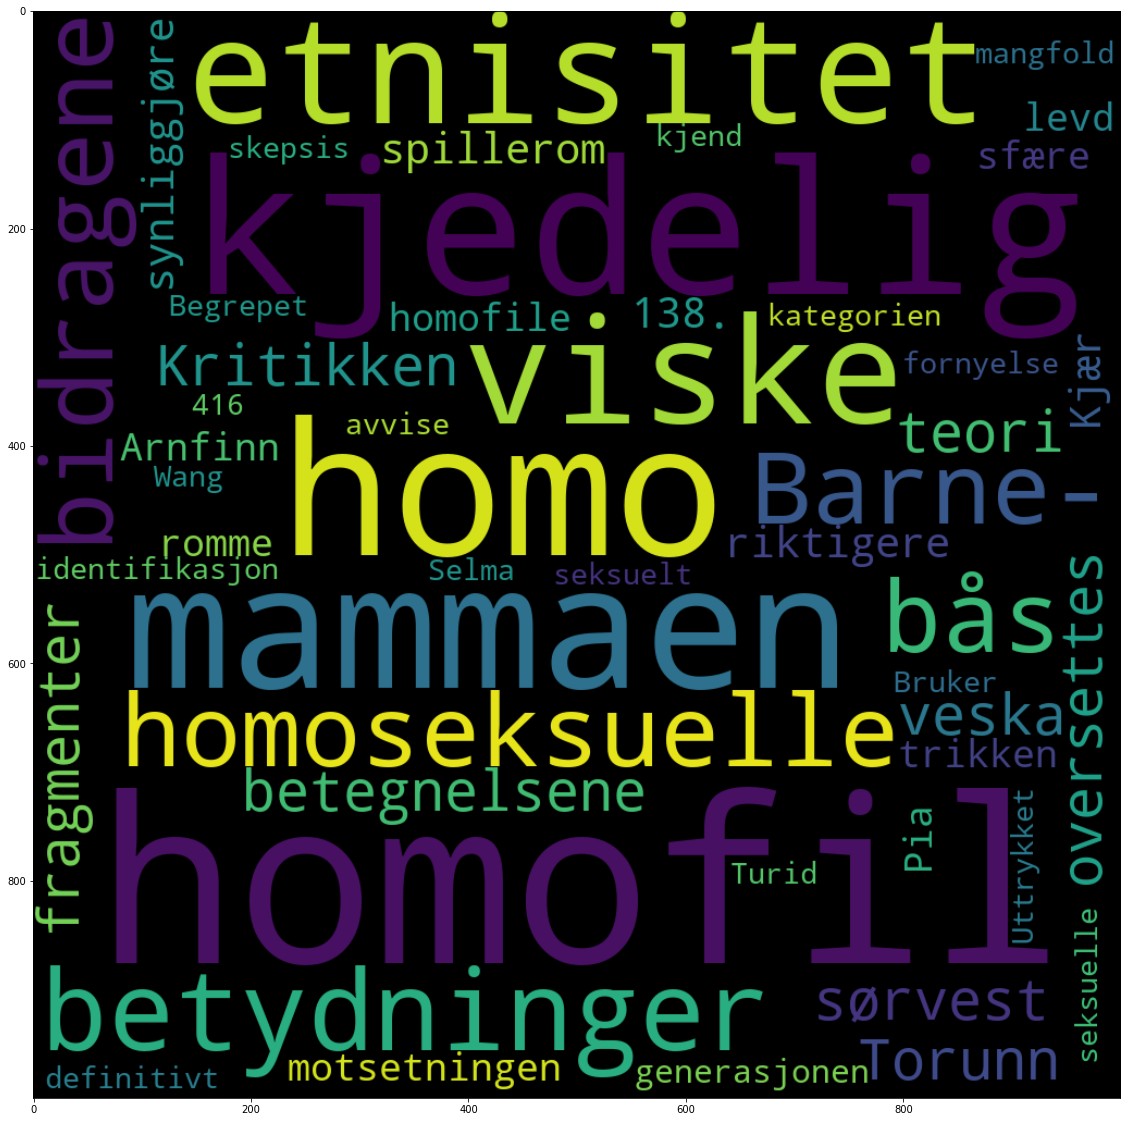

In [25]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin i korpuset vårt, målt mot alle bøker i nb.no 

nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

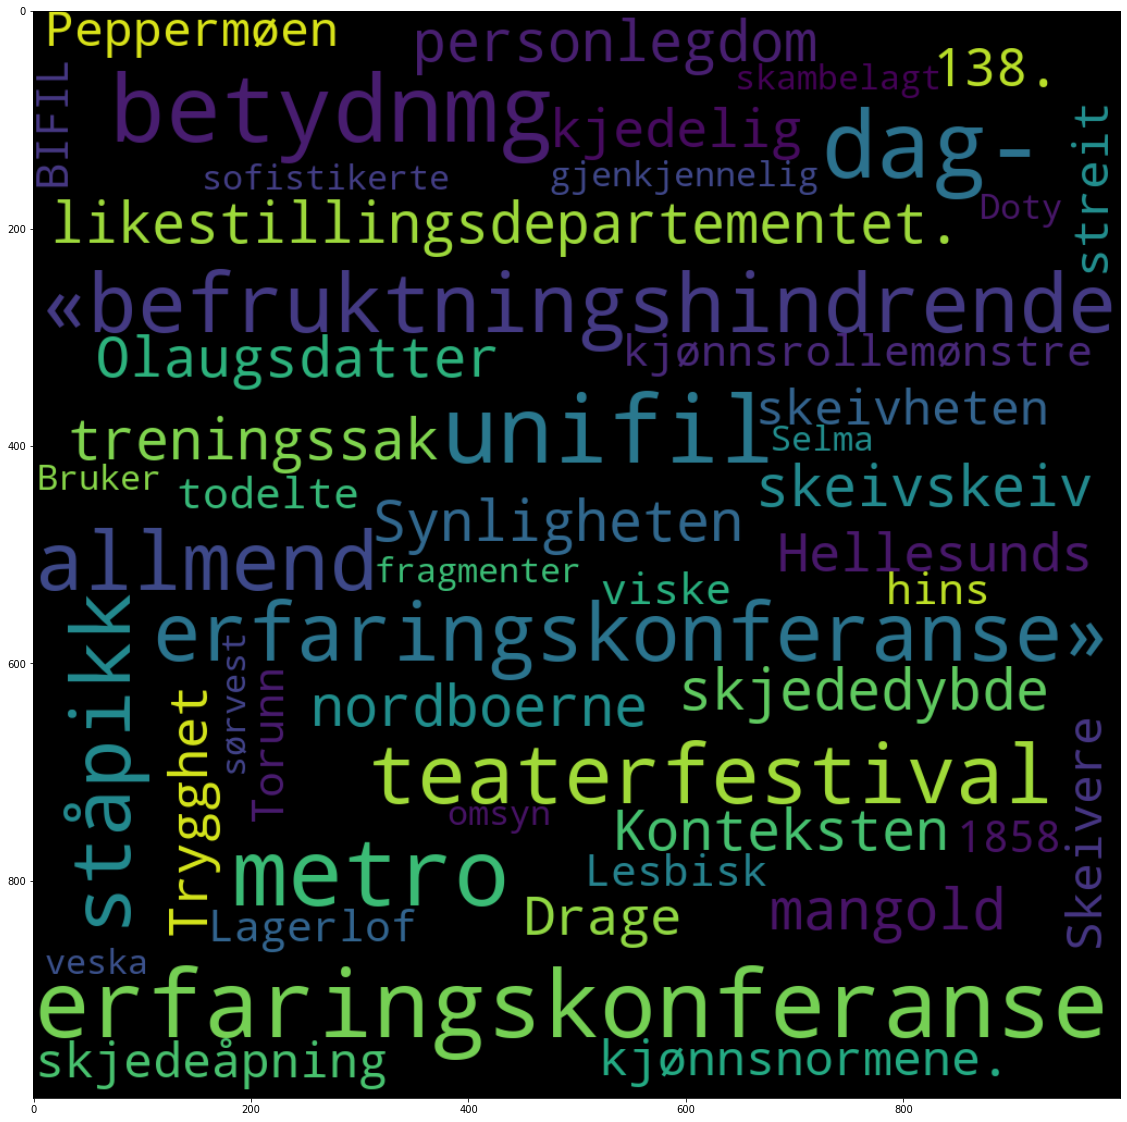

In [26]:
# Her viser vi de 50 viktigste ordene som er assosiert med rødvin, målt mot hele "Drikkevare"-korpuset

nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())

## 4. Gjenbruk med andre ord og korpus

1. Bytt ut parametrene i cellen der `korpus` blir definert.
2. Bytt ut ordet som er angitt som `collword`.
3. Gå til `Cell` i menyen og velg `Run All`.

Det er også mulig å først velge `File` og `Make a Copy`, slik at man oppretter en ny notebook før man starter.

Tilbake til [DHLAB ved Nasjonalbiblioteket](https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb)